    Name: Ameya Satish Khond
    SJSU ID: 019136845

# Part 1

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, binom, expon
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('heart_dataset.csv')

df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,134.0,13.60,3.50,27.78,Present,60.0,25.99,57.34,49.0,1.0
1,132.0,6.20,6.47,36.21,Present,62.0,30.77,14.14,45.0,0.0
2,142.0,4.05,3.38,16.20,Absent,NaN,20.81,2.62,38.0,0.0
3,114.0,4.08,4.59,14.60,Present,62.0,23.11,6.72,58.0,NaN
4,114.0,NaN,3.83,19.40,Present,49.0,24.86,2.49,NaN,NaN


    1. Look at each variables(features) in the dataset and decide if it belongs to one of these four groups: 
sbp - Discrete  
tobacco - Continuous    
ldl - Continuous    
adiposity - Continuous       
famhist - Binary Categorical (The column contains only two features: Present and Absent)  
typea - Discrete  
obesity - Continuous  
alcohol - Continuous  
age - Discrete   
chd - Binary Categorical (The column contains only two features: 1 and 0)  

Number of missing values per column:
sbp          28
tobacco      40
ldl          39
adiposity    40
famhist      45
typea        41
obesity      40
alcohol      40
age          35
chd          39
dtype: int64


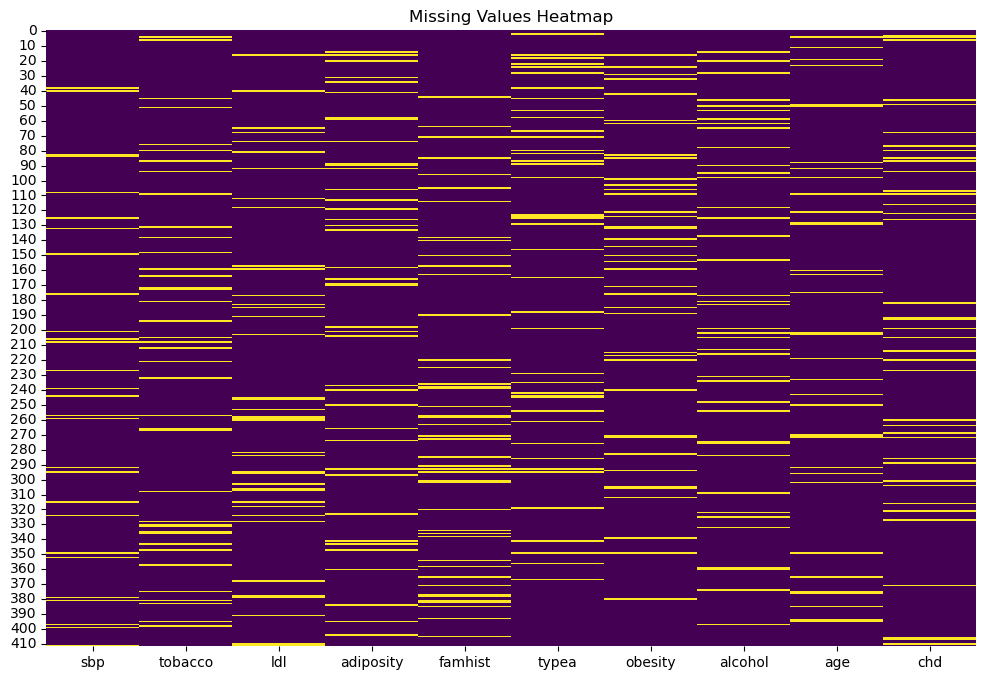

In [195]:
# 2. Count missing values per column

missing_values = df.isnull().sum()
print("Number of missing values per column:")
print(missing_values) 

# Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Explanation for Heatmap
The heatmap visualizes the presence of missing data across the dataset.  
If a column has no missing values, its rows will be in uniform color (e.g., dark blue/black).  
Yellow color indicates missing values in that particular cell.  
This plot confirms the results of the isnull().sum() count and provides a quick visual assessment of the missing data pattern.


# 3. Descriptive Analysis

In [196]:
# 3.1 Show general descriptive statistics

df.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,384.000000,372.000000,373.000000,372.000000,371.000000,372.000000,372.000000,377.000000,373.000000
mean,139.216146,3.676425,4.569303,25.210753,52.008086,25.763602,18.425134,42.453581,0.335121
std,20.307368,4.568564,1.888691,7.760257,9.822888,3.854265,25.971090,15.312649,0.472667
min,101.000000,0.000000,0.980000,7.120000,20.000000,17.890000,0.000000,15.000000,0.000000
25%,124.000000,0.057500,3.240000,19.307500,46.000000,22.835000,0.195000,30.000000,0.000000
50%,136.000000,1.800000,4.220000,26.115000,52.000000,25.675000,7.300000,45.000000,0.000000
75%,148.500000,5.640000,5.470000,30.790000,58.000000,28.167500,25.820000,57.000000,1.000000
max,218.000000,27.400000,14.160000,42.490000,73.000000,40.340000,145.290000,64.000000,1.000000


In [197]:
# 3.2 Person(s) with the highest cholestrol(ldl)

print("Maximum LDL:", df['ldl'].max())

highest_ldl = df[df['ldl'] == df['ldl'].max()]
print("\nRecords of person(s) with the highest LDL:")
print(highest_ldl)

Maximum LDL: 14.16

Records of person(s) with the highest LDL:
       sbp  tobacco    ldl  adiposity famhist  typea  obesity  alcohol  age  \
302  164.0      8.2  14.16      36.85     NaN   52.0     28.5    17.02  NaN   

     chd  
302  1.0  


In [198]:
# 3.3 Person(s) with the lowest systolic blood pressure (sbp)

print("Minimum SBP:", df['sbp'].min())

lowest_sbp = df[df['sbp'] == df['sbp'].min()]
print("\nRecord(s) of person(s) with the lowest SBP:")
print(lowest_sbp)

Minimum SBP: 101.0

Record(s) of person(s) with the lowest SBP:
       sbp  tobacco   ldl  adiposity famhist  typea  obesity  alcohol   age  \
230  101.0     0.48  7.26       13.0  Absent   50.0    19.82     5.19  16.0   

     chd  
230  0.0  


In [199]:
# 3.4  Mean and Standard Deviation of Tobacco Consumption

print("Mean and Standard Deviation of Tobacco Consumption")
tobacco_mean = df['tobacco'].mean()
tobacco_std = df['tobacco'].std()

print(f"Mean of tobacco consumption: {tobacco_mean:.2f} kg")
print(f"Standard deviation of tobacco consumption: {tobacco_std:.2f} kg")

Mean and Standard Deviation of Tobacco Consumption
Mean of tobacco consumption: 3.68 kg
Standard deviation of tobacco consumption: 4.57 kg


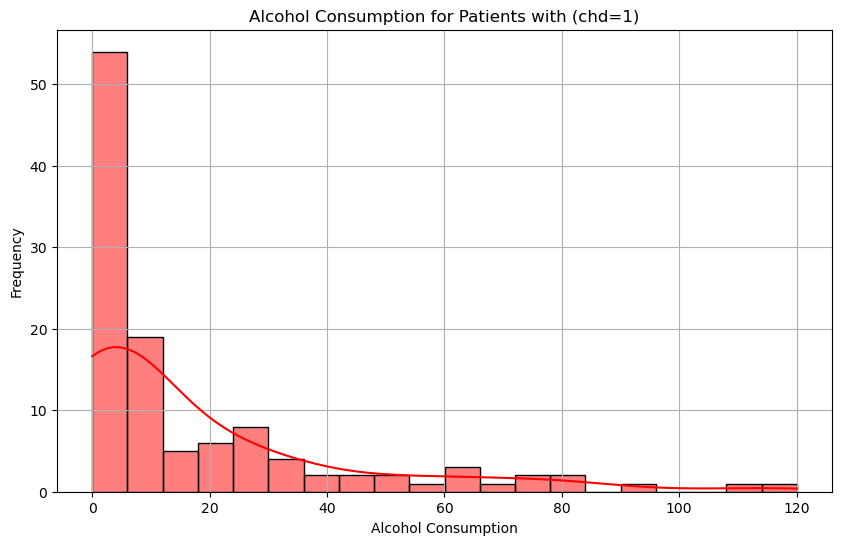

In [200]:
# 3.5 Filter data for patients with chd = 1

chd_positive = df[df['chd'] == 1]

plt.figure(figsize=(10, 6))
sns.histplot(chd_positive['alcohol'], bins=20, kde=True, color='red')
plt.title('Alcohol Consumption for Patients with (chd=1)')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Explanation for Alcohol Histograms
This histogram shows the frequency of different alcohol consumption levels for the patients who were diagnosed with coronary heart disease (chd=1).  
Insight: The distribution is heavily right-skewed, indicating that the vast majority of patients who had CHD (chd=1) are low or non-drinkers of alcohol.   
The frequency drops sharply as alcohol consumption increases.

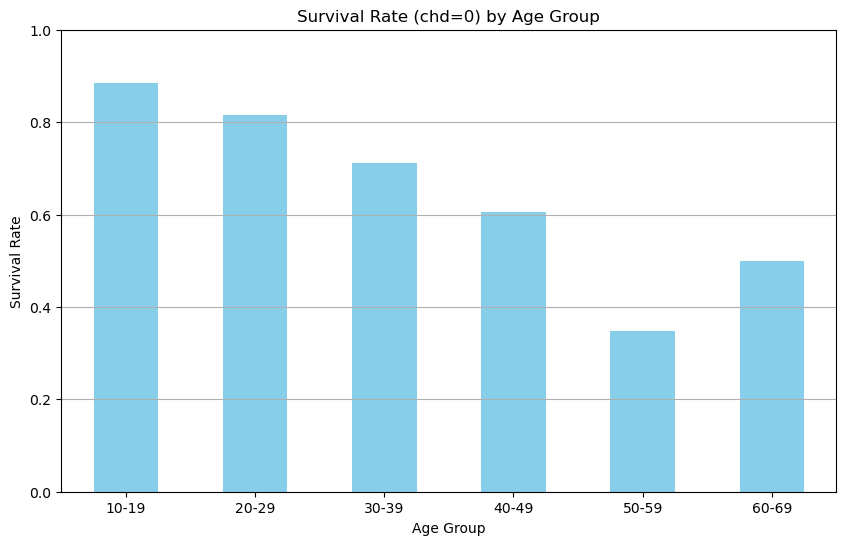

age_group
10-19    0.884615
20-29    0.815789
30-39    0.711864
40-49    0.604938
60-69    0.500000
50-59    0.348315
Name: chd, dtype: float64


In [201]:
# 3.6 Create age groups (bins by decade)

bins = [10, 20, 30, 40, 50, 60, 70]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

survival_rate = df[df['chd'] == 0]['age_group'].value_counts() / df['age_group'].value_counts()
survival_rate = survival_rate.sort_index()
survival_rate = df.groupby('age_group')['chd'].apply(lambda x: (x==0).mean())

plt.figure(figsize=(10, 6))
survival_rate.plot(kind='bar', color='skyblue')
plt.title('Survival Rate (chd=0) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

print(survival_rate.sort_values(ascending=False))


# Explanation for Bar chart
This bar plot shows the proportion of patients who did NOT have Coronary Heart Disease (chd=0, survived) across different age groups.   
The group with the highest bar has the largest survival rate.    
Insight: The youngest age groups typically have the highest survival rates, and the rate generally decreases as age increases, which is expected for heart disease. 

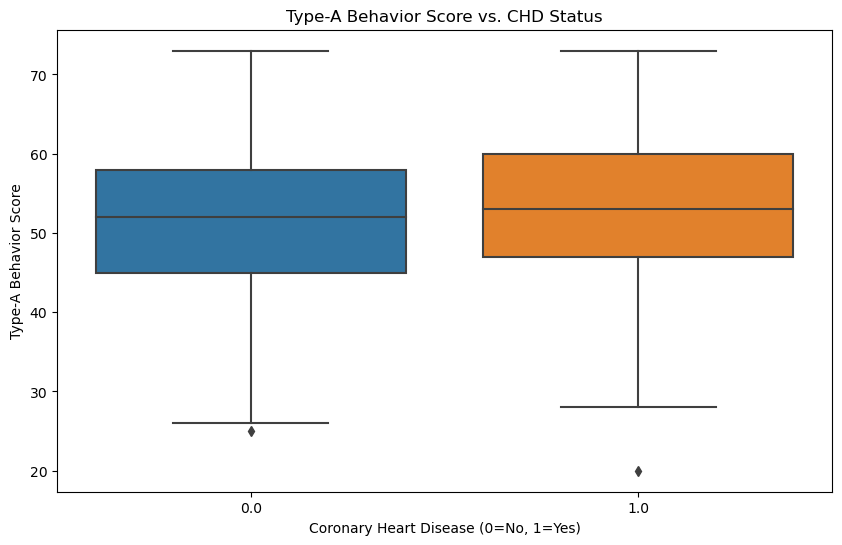

In [202]:
# 3.7 Create a boxplot to investigate the relationship

plt.figure(figsize=(10, 6))
sns.boxplot(x='chd', y='typea', data=df)
plt.title('Type-A Behavior Score vs. CHD Status')
plt.xlabel('Coronary Heart Disease (0=No, 1=Yes)')
plt.ylabel('Type-A Behavior Score')
plt.show()


# Explanation for Boxplot 
The boxplot compares the distribution of the Type-A behavior score for patients with and without CHD.  
The horizontal line in the box represents the median score.  
Insight: We can observe if the median and overall distribution of the 'typea' score is higher for the chd=1 group or the chd=0 group.  
For example, if the box for chd=1 is visibly higher than chd=0, it suggests a positive relationship.

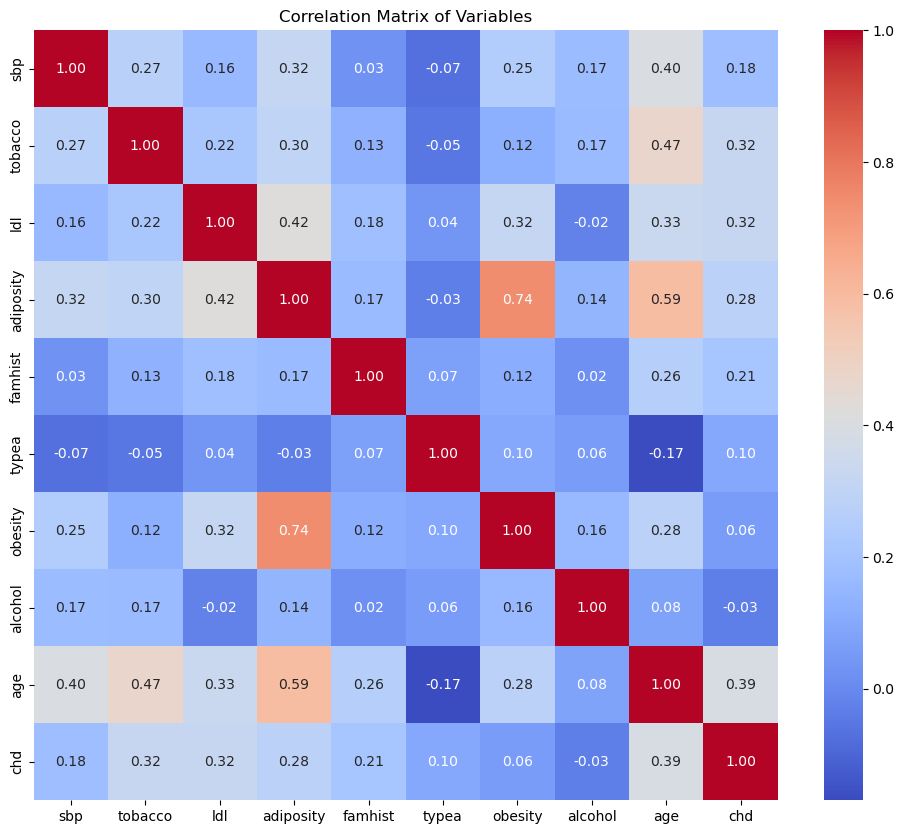

In [203]:
# 3.8 a) Correaltion matrix (heatmap)


df['famhist'] = df['famhist'].map({'Present': 1, 'Absent': 0})

plt.figure(figsize=(12, 10))
correlation_matrix = df.drop(columns=['age_group']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

# Explanation for Correlation Matrix
This heatmap shows the Pearson correlation coefficient between all numerical variables.  
Values close to +1 (red) indicate a strong positive correlation, values close to -1 (blue) indicate a strong negative correlation, and values close to 0 (white/purple) indicate a weak correlation.  
Insight: It's particularly useful to look at the correlations with the target variable 'chd' to quickly identify the features most strongly associated with heart disease.


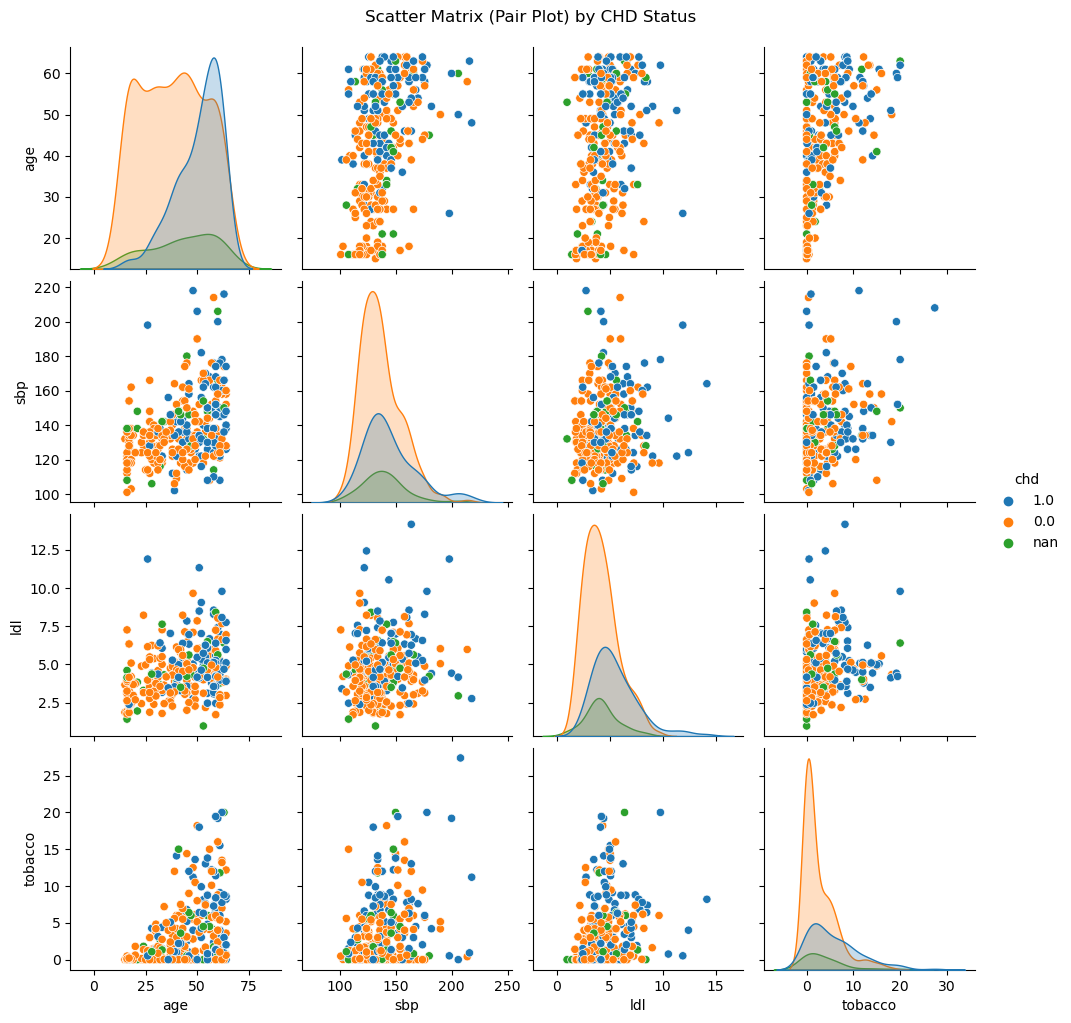

In [204]:
# b) Scatter matrix (pair plot)

subset_cols = ['age', 'sbp', 'ldl', 'tobacco', 'chd']

temp_df = df[subset_cols].copy()
temp_df['chd'] = temp_df['chd'].astype(str) 

sns.pairplot(temp_df, hue='chd', diag_kind='kde')
plt.suptitle('Scatter Matrix (Pair Plot) by CHD Status', y=1.02)
plt.show()

# Explanation for Scatter Matrix 
The scatter matrix (pair plot) shows a scatter plot for every pair of variables and a histogram/KDE for each single variable on the diagonal. The points are colored by the 'chd' status (0 or 1).  
Insight: Scatter plots help to visualize the bivariate relationship between features, and if the points for chd=1 tend to cluster in a different region than chd=0, it suggests a clear separation/relationship. The diagonal plots show the univariate distribution of each feature.


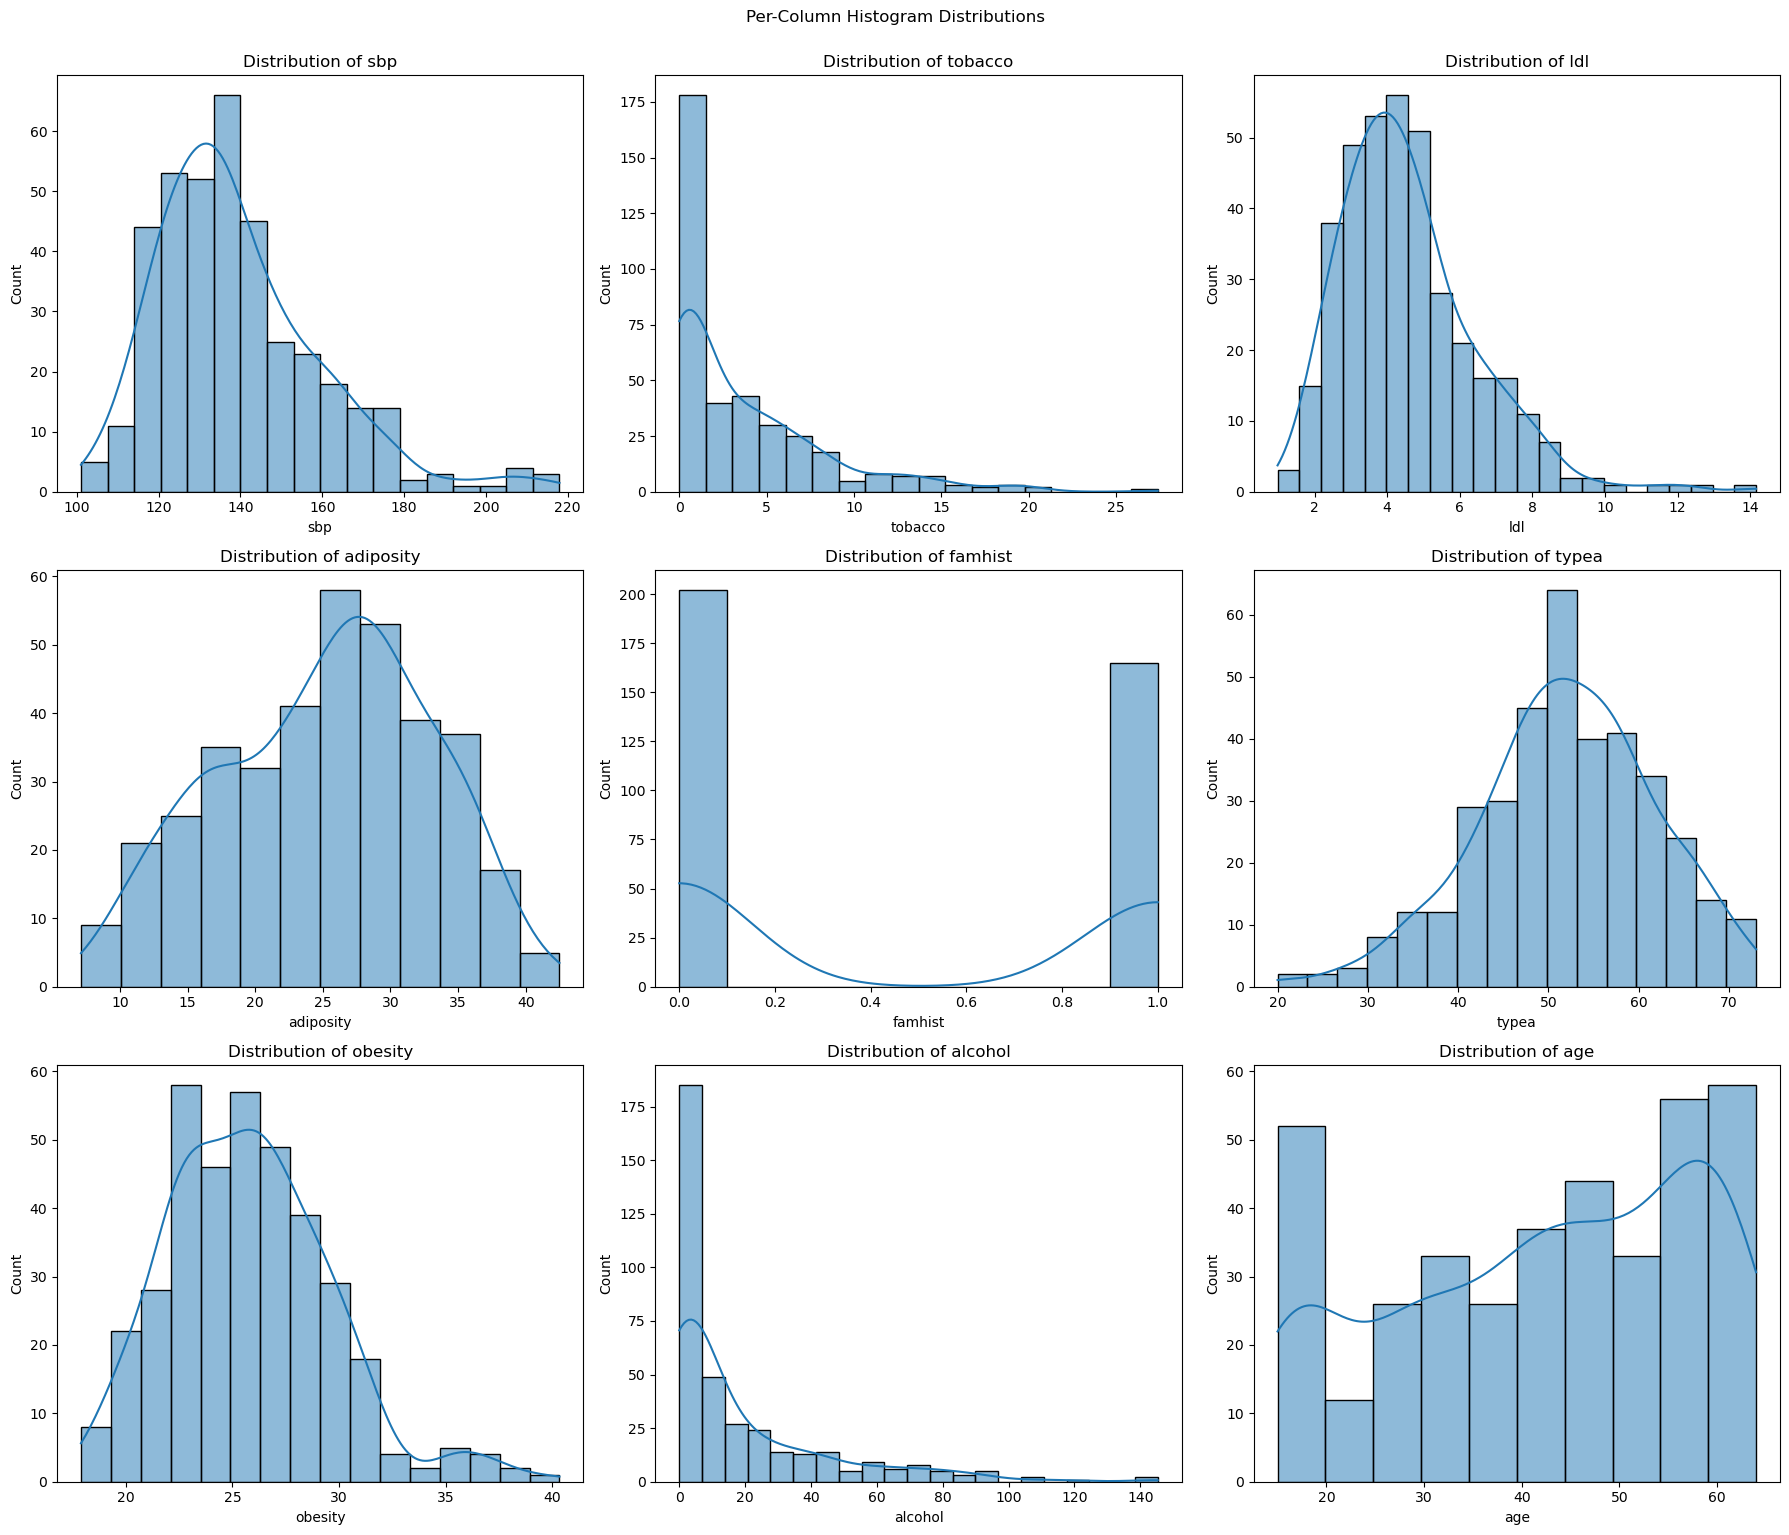

In [205]:
# c) Per-column histogram distribution

numerical_cols = df.select_dtypes(include=np.number).columns.drop(['chd'])
num_plots = len(numerical_cols)
fig, axes = plt.subplots(nrows=(num_plots + 1) // 3, ncols=3, figsize=(18, 5 * ((num_plots + 1) // 3)))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)


plt.tight_layout()
plt.suptitle('Per-Column Histogram Distributions', y=1.02)
plt.show()


# Explanation for Per-Column Histogram
These histograms show the individual distribution of all continuous and discrete numerical features.  
The KDE (Kernel Density Estimate) overlay helps to visualize the shape of the distribution.  
Insight: They reveal features like skewness (e.g., 'tobacco' and 'alcohol' are highly right-skewed), modality (e.g., whether the distribution has one or more peaks), and potential outliers.


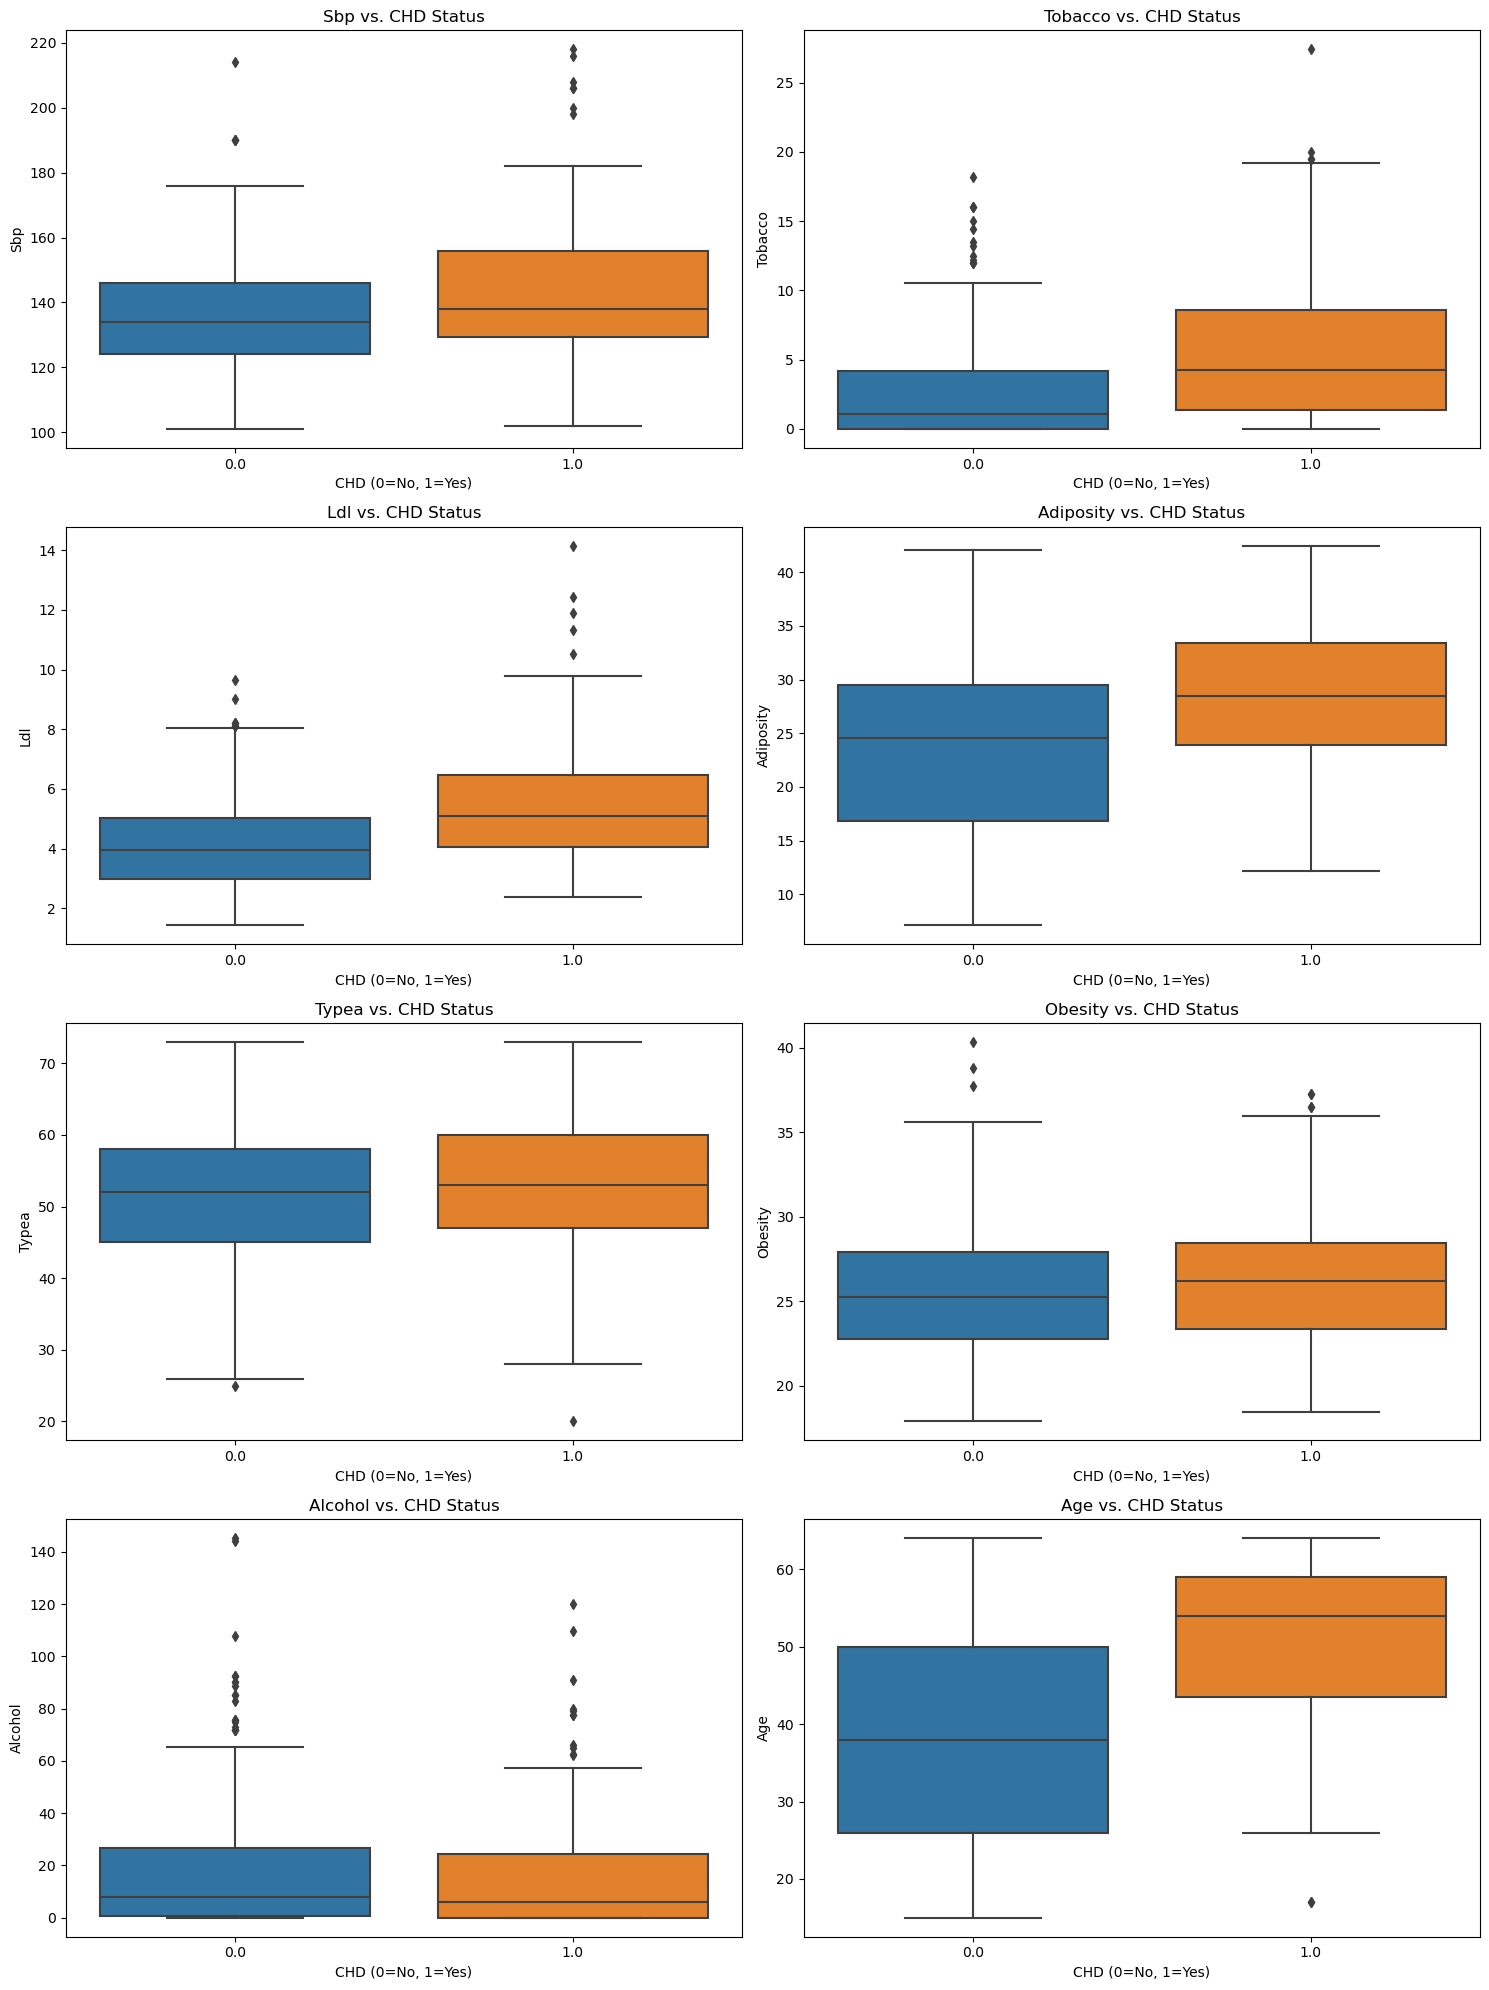

In [206]:
# d) Boxplots for continuous variables split by chd

continuous_vars = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten() 

for i, var in enumerate(continuous_vars):
    sns.boxplot(x='chd', y=var, data=df, ax=axes[i])
    axes[i].set_title(f'{var.capitalize()} vs. CHD Status')
    axes[i].set_xlabel('CHD (0=No, 1=Yes)')
    axes[i].set_ylabel(var.capitalize())

plt.tight_layout()
plt.show()

# Explanation for Boxplots for variables split by chd
These boxplots show the distribution of each continuous variable, separated for the two CHD groups (0 and 1).  
Insight: Comparing the boxes visually helps to assess if there are significant differences in the median, spread (IQR), and presence of outliers between the two CHD groups for each feature. For example, if the median for  'age' in the chd=1 group is much higher than chd=0, it suggests age is a strong risk factor.

In [207]:
# 9. a) Calculate the overall probability of chd=1 in the population

p_chd = df['chd'].mean()

n = 100  # sample size
k = 40   

# We want P(X > 40), which is 1 - P(X <= 40)
prob_more_than_40 = 1 - stats.binom.cdf(k, n, p_chd)

print(f"The overall probability of chd=1 (p) is: {p_chd:.4f}")
print(f"The probability of more than 40% (i.e., >40) of 100 patients having chd is: {prob_more_than_40:.4f}")

The overall probability of chd=1 (p) is: 0.3351
The probability of more than 40% (i.e., >40) of 100 patients having chd is: 0.0710


In [208]:
# b) Count the number of patients matching the criteria

older_and_famhist = df[(df['age'] > 60) & (df['famhist'] == 1)]
num_matches = len(older_and_famhist)
total_patients = len(df)

prob_older_and_famhist = num_matches / total_patients

print(f"Number of patients older than 60 with a family history: {num_matches}")
print(f"Total number of patients: {total_patients}")
print(f"Estimated probability: {prob_older_and_famhist:.4f}")

Number of patients older than 60 with a family history: 21
Total number of patients: 412
Estimated probability: 0.0510


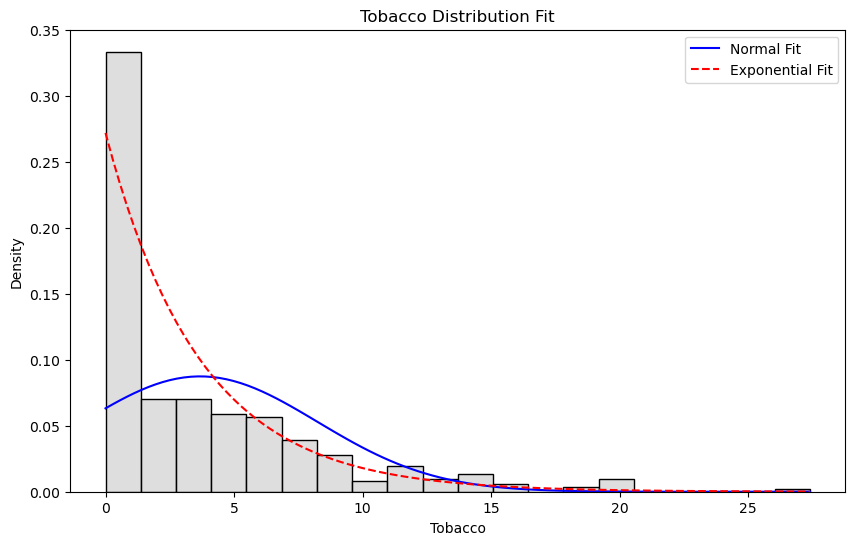

In [209]:
# 3.10 Plot the distribution of tobacco consumption

x = df['tobacco'].dropna()
mu, sigma = norm.fit(x)
loc, scale = expon.fit(x, floc=0)
x_line = np.linspace(0, x.max(), 100)

plt.figure(figsize=(10, 6))
sns.histplot(x, bins=20, kde=False, stat="density", color='lightgrey')
plt.plot(x_line, norm.pdf(x_line, mu, sigma), label='Normal Fit',color='blue')
plt.plot(x_line, expon.pdf(x_line, loc, scale),'r--', label='Exponential Fit',color='red')
plt.title("Tobacco Distribution Fit")
plt.xlabel("Tobacco")
plt.ylabel("Density")
plt.legend()
plt.show()


# Explnation for Tobacco consumption Plot
The data for tobacco consumption is heavily skewed to the right, with a peak near zero.  
The fitted Exponential distribution (red dashed line) clearly follows the shape of the actual data much more closely than the Normal distribution (blue solid line).    
The Normal distribution fails to capture the high frequency of low values and the long tail. Therefore, the Exponential distribution is a better fit for this data.

# Part 2

In [210]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris_df = load_iris()

In [211]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [212]:
# 1. a) Function for plot_std_normal_with_probability(mean, std, lower, upper)

def plot_std_normal_with_probability(mean, std, lower, upper):
    
    x = np.linspace(mean - 4*std, mean + 4*std, 1000)
    y = stats.norm.pdf(x, mean, std)
    plt.figure(figsize=(10, 6))

    plt.plot(x, y, label='Normal PDF')
    
    x_fill = np.linspace(lower, upper, 100)
    y_fill = stats.norm.pdf(x_fill, mean, std)
    plt.fill_between(x_fill, y_fill, alpha=0.5, color='orange', label=f'P({lower} < X < {upper})')
    
    prob = stats.norm.cdf(upper, mean, std) - stats.norm.cdf(lower, mean, std)
    
    plt.title(f'Normal Distribution (μ={mean:.2f}, σ={std:.2f})')
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid()
    plt.show()
    
    return prob

In [213]:
# b) Filter for Setosa and get stats for petal length

setosa_petal_length = iris_df[iris_df['species'] == 'setosa']['petal length (cm)']
mean_setosa = setosa_petal_length.mean()
std_setosa = setosa_petal_length.std()

lower_bound = 1.2
upper_bound = 1.8

prob_setosa = stats.norm.cdf(upper_bound, mean_setosa, std_setosa) - stats.norm.cdf(lower_bound, mean_setosa, std_setosa)

print(f"Mean petal length for Setosa: {mean_setosa:.2f} cm")
print(f"Std dev petal length for Setosa: {std_setosa:.2f} cm")
print(f"Probability of petal length between 1.2 and 1.8 cm for Setosa: {prob_setosa:.4f}")

Mean petal length for Setosa: 1.46 cm
Std dev petal length for Setosa: 0.17 cm
Probability of petal length between 1.2 and 1.8 cm for Setosa: 0.9085


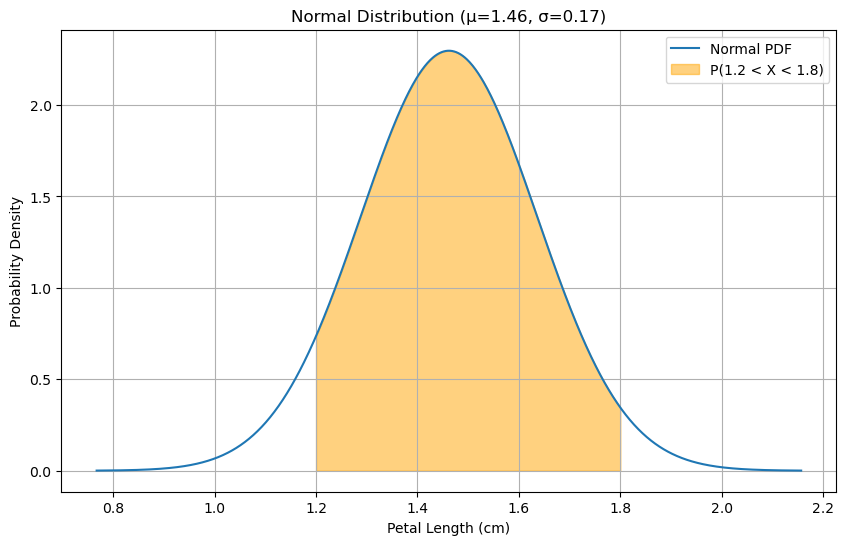

0.9084970792034468

In [214]:
# c) Plot using the function

plot_std_normal_with_probability(mean_setosa, std_setosa, lower_bound, upper_bound)

# Explanation  for Normal Distribution Plot
The plot displays the fitted normal probability density function (PDF) for Setosa petal length using the calculated sample mean and standard deviation.   
The shaded area represents the probability that a randomly chosen Setosa flower has a petal length between 1.2 cm and 1.8 cm, which was computed using the cumulative distribution function (CDF).

In [215]:
# 2. a) Parameters for the Binomial distribution

n_sample = 20
k_exact = 8

p_setosa = (iris_df['species'] == 'setosa').mean()

prob_exact_8 = stats.binom.pmf(k_exact, n_sample, p_setosa)

print(f"Proportion of Setosa in dataset (p): {p_setosa:.4f}")
print(f"Probability of observing exactly 8 Setosa flowers in a sample of 20: {prob_exact_8:.4f}")

Proportion of Setosa in dataset (p): 0.3333
Probability of observing exactly 8 Setosa flowers in a sample of 20: 0.1480


In [216]:
# b) Probability of observing at least 10 Setosa flowers.

k_at_least = 9

prob_at_least_10 = 1 - stats.binom.cdf(k_at_least, n_sample, p_setosa)

print(f"Probability of observing at least 10 Setosa flowers: {prob_at_least_10:.4f}")

Probability of observing at least 10 Setosa flowers: 0.0919


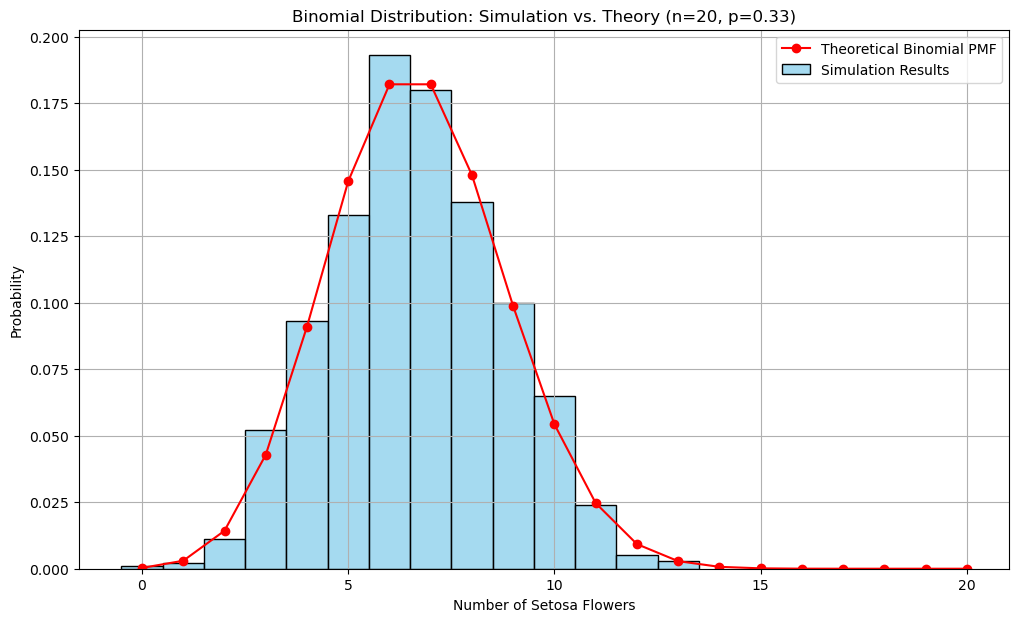

In [233]:
# c) Simulate 1,000 random samples

num_simulations = 1000
simulations = np.random.binomial(n_sample, p_setosa, num_simulations)

plt.figure(figsize=(12, 7))
sns.histplot(simulations, stat='probability', discrete=True, label='Simulation Results', color='skyblue')

k_values = np.arange(0, n_sample + 1)
pmf_values = stats.binom.pmf(k_values, n_sample, p_setosa)
plt.plot(k_values, pmf_values, 'ro-', label='Theoretical Binomial PMF')

plt.title('Binomial Distribution: Simulation vs. Theory (n=20, p=0.33)')
plt.xlabel('Number of Setosa Flowers')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

# Explanation for 1000 Random Samples Plot
The histogram from our 1,000 random simulations closely matches the shape and values of the theoretical Binomial PMF (red line).  
This confirms that the Binomial distribution is an excellent model for this sampling scenario.  
The most likely outcome is observing around 6 or 7 Setosa flowers in a sample of 20.

In [234]:
# 3. a) Hypotheses

print("H0 (Null Hypothesis): The average sepal lengths of Versicolor and Virginica are NOT significantly different. (μ_versicolor = μ_virginica)")
print("\nH1 (Alternative Hypothesis): The average sepal lengths of Versicolor and Virginica are significantly different. (μ_versicolor ≠ μ_virginica)")

H0 (Null Hypothesis): The average sepal lengths of Versicolor and Virginica are NOT significantly different. (μ_versicolor = μ_virginica)

H1 (Alternative Hypothesis): The average sepal lengths of Versicolor and Virginica are significantly different. (μ_versicolor ≠ μ_virginica)


In [235]:
# b) Extract sepal length data for Versicolor and Virginica

sepal_length_versicolor = iris_df[iris_df['species'] == 'versicolor']['sepal length (cm)']
sepal_length_virginica = iris_df[iris_df['species'] == 'virginica']['sepal length (cm)']

t_statistic, p_value = stats.ttest_ind(sepal_length_versicolor, sepal_length_virginica)

print(f"\nT-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4e}") 


T-statistic: -5.6292
P-value: 1.7249e-07


In [236]:
# c) Conclusion at α=0.05

alpha = 0.05

print(f"Significance Level (α): {alpha}")

if p_value < alpha:
    # If p < alpha, reject H0 (Null Hypothesis: means are equal)
    print(f"\nThe P-value ({p_value:.4e}) is LESS than the significance level α ({alpha}).")
    print("Therefore, we REJECT the null hypothesis (H0).")
else:
    # If p >= alpha, fail to reject H0
    print(f"\nThe P-value ({p_value:.4e}) is GREATER THAN or equal to the significance level α ({alpha}).")
    print("Therefore, we FAIL TO REJECT the null hypothesis (H0).")


Significance Level (α): 0.05

The P-value (1.7249e-07) is LESS than the significance level α (0.05).
Therefore, we REJECT the null hypothesis (H0).


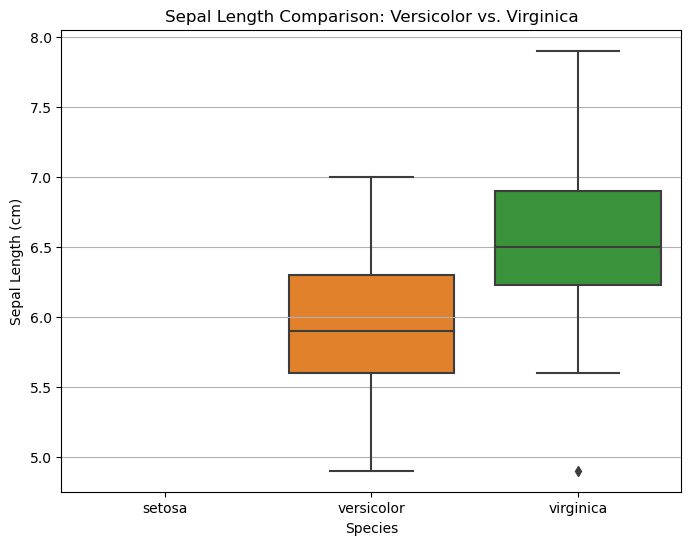

In [245]:
# d) Side by Side boxplots for Versicolor and Virginica

versicolor_virginica_df = iris_df[iris_df['species'].isin(['versicolor', 'virginica'])]

plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='sepal length (cm)', data=versicolor_virginica_df)
plt.title('Sepal Length Comparison: Versicolor vs. Virginica')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.grid(axis = 'y')
plt.show()

# Explanation for Versicolor and Virginica Boxplot
The boxplot visually supports our t-test conclusion. The entire box for Virginica is shifted upwards compared to Versicolor, and their medians are clearly distinct with no overlap in their interquartile ranges. This indicates that Virginica flowers tend to have a larger sepal length than Versicolor flowers.  
Also, the boxplot shows us that there is an outlier in Virginica.

In [246]:
# 4. a) Python function for Bayes' theorem

def calculate_posterior(prior, likelihood, evidence):
    
    if evidence == 0:
        return 0
    return (likelihood * prior) / evidence

In [247]:
# b) Set Prior and Likelihood Values (from Iris dataset)

# P(V) = probability that a flower is Virginica

prior_A = (iris_df['species'] == 'virginica').mean()

# P(B|A): Likelihood - P(Petal Width > 1.8 | Virginica)

likelihood_B_given_A = (iris_df[iris_df['species'] == 'virginica']['petal width (cm)'] > 1.8).mean()

prior_not_A = 1 - prior_A
likelihood_B_given_not_A = (iris_df[iris_df['species'] != 'virginica']['petal width (cm)'] > 1.8).mean()

evidence_B = (likelihood_B_given_A * prior_A) + (likelihood_B_given_not_A * prior_not_A)

print(f"P(Virginica) [Prior]: {prior_A:.4f}")
print(f"P(Petal Width > 1.8 | Virginica) [Likelihood]: {likelihood_B_given_A:.4f}")
print(f"P(Petal Width > 1.8) [Evidence]: {evidence_B:.4f}")

P(Virginica) [Prior]: 0.3333
P(Petal Width > 1.8 | Virginica) [Likelihood]: 0.6800
P(Petal Width > 1.8) [Evidence]: 0.2267


In [248]:
# c) Calculate the posterior probability
posterior_prob = calculate_posterior(prior_A, likelihood_B_given_A, evidence_B)

print(f"The probability that a flower is Virginica given its petal width > 1.8 cm is: {posterior_prob:.4f}")

The probability that a flower is Virginica given its petal width > 1.8 cm is: 1.0000


# Explanation:

Given that a flower has a petal width greater than 1.8 cm, the probability that it is a Virginica is (99.97%) approximately 100%. This is a very high probability, making petal width a strong indicator for this species. 

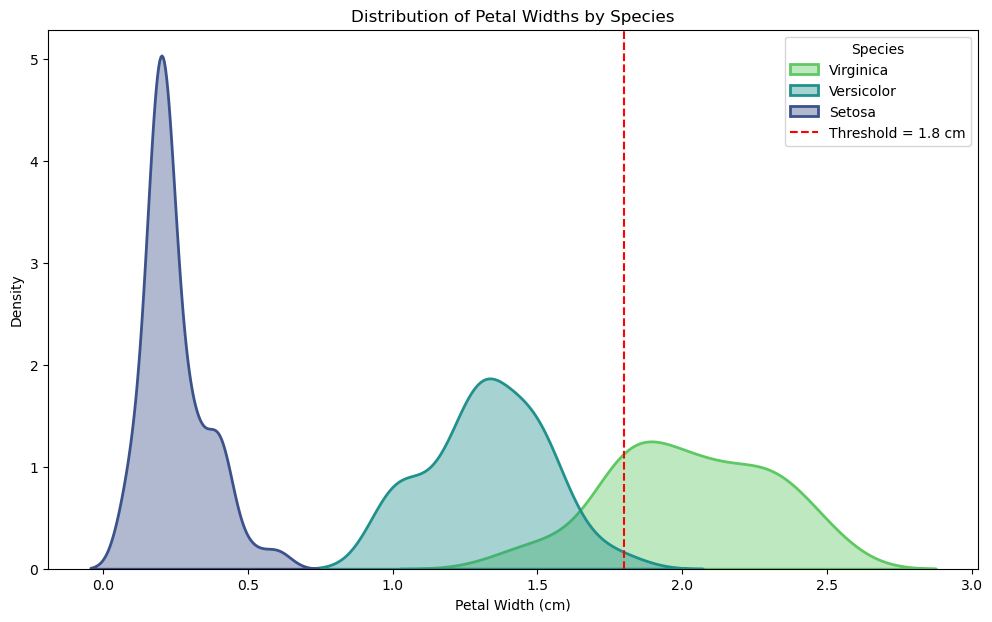

In [241]:
# d) Distribution of petal widths for all 3 species with a vertical line at 1.8cm

plt.figure(figsize=(12, 7))
sns.kdeplot(
    data=iris_df, 
    x='petal width (cm)', 
    hue='species', 
    fill=True, 
    common_norm=False, 
    alpha=0.4,
    linewidth=2,
    palette='viridis' 
)
plt.axvline(x=1.8, color='red', linestyle='--', label='Threshold = 1.8 cm')
plt.title('Distribution of Petal Widths by Species')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Density')
plt.legend(title='Species', labels=['Virginica', 'Versicolor', 'Setosa', 'Threshold = 1.8 cm'])
plt.show()

# Explanation for All 3 Species Distribution Plot with Threshold value
This density plot shows the distribution of petal width for all three Iris species.  
The red dashed line marks the threshold of 1.8 cm.  
Insight: The Virginica distribution is heavily skewed to the right of the 1.8 cm line, meaning a large proportion of Virginica flowers have a petal width > 1.8 cm (high P(E|V)).  
Conversely, the other two species (Setosa and Versicolor) have almost no presence past the 1.8 cm line (low P(E|not V)), which explains why the posterior probability P(Virginica | E) is very high.